In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

sns.set()

%matplotlib inline

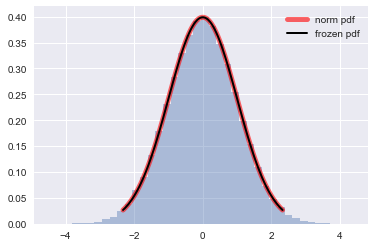

In [41]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(sts.norm.ppf(0.01), sts.norm.ppf(0.99), 100)
ax.plot(x, sts.norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')

rv = sts.norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = sts.norm.rvs(size=100000)
ax.hist(r, bins=40, density=True, histtype='stepfilled', alpha=0.4)
ax.legend(loc='best', frameon=False)
plt.show()

In [15]:
vals = sts.norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], sts.norm.cdf(vals))


True

# Нормальное распределение

Вот так можно сгенерировать выборку из нормально распределённой случайной величины с параметрами $\mu=2.0$ и $\sigma=0.5$:

In [42]:
mu = 2.0
sigma = 0.5

# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерируем 10 значений
norm_rv.rvs(size=10)

array([1.41703699, 2.05986395, 2.32573898, 2.59145544, 0.74214761,
       1.82395383, 2.18276544, 2.27908774, 2.16600577, 1.83293336])

Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.

Следующая функция возвращает значение функции распределения нормальной случайной величины в точке, соответствующей её аргументу:

In [49]:
norm_rv.cdf(1)

0.022750131948179195

Построим график функции распределения:

Text(0.5,0,'$x$')

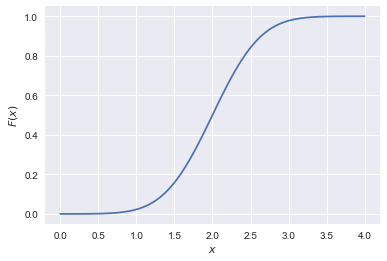

In [45]:
x = np.linspace(0,4,100)
cdf = norm_rv.cdf(x) # функция может принимать и вектор (x)
plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [46]:
norm_rv.pdf(3)

0.10798193302637613

Построим график функции плотности вероятности:

Text(0.5,0,'$x$')

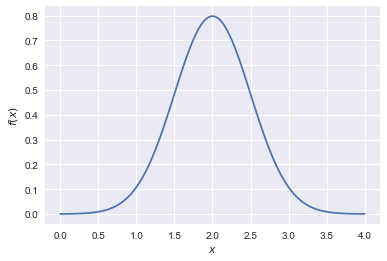

In [50]:
x = np.linspace(0,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Равномерное распределение на отрезке

Вот так можно сгенерировать выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

In [51]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([3.24774102, 3.39969637, 2.35902966, 1.15619701, 2.05439114,
       2.0209328 , 2.10497325, 1.16770937, 3.7687044 , 3.50536676])

А так — вычислять значения функций распределения и плотностей:

Text(0.5,0,'$x$')

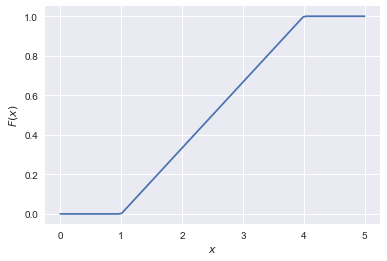

In [52]:
x = np.linspace(0,5,100)
cdf = uniform_rv.cdf(x)
plt.plot(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

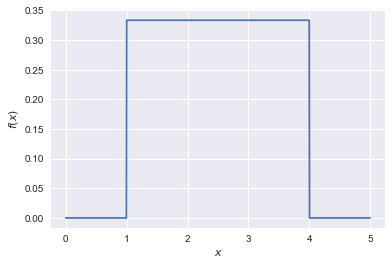

In [58]:
x = np.linspace(0,5,1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [55]:
uniform_rv.pdf(0.99)

0.0

# Распределение Бернулли

Генерация выборок из распределения Бернулли с заданным параметром $p$:

In [63]:
bernoulli_rv = sts.bernoulli(0.7)

bernoulli_rv.rvs(10)

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1])

# Биномиальное распределение

Генерация выборок из биномиального распределения:

In [80]:
binomial_rv = sts.binom(40, 0.7)
binomial_rv.rvs(10)

array([28, 30, 26, 24, 32, 26, 31, 31, 30, 27])

Первый аргумент функции binom — значение параметра $n$, второй — параметра $p$.

Функция распределения:

Text(0.5,0,'$x$')

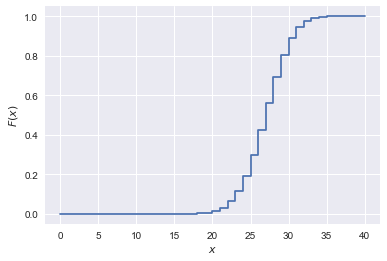

In [93]:
x = np.arange(0, 41, 1.)
cdf = binomial_rv.cdf(x)
plt.step(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Функция вероятности ```pmf``` для дискретных случайных величин заменяет функцию плотности ```pdf```:

Text(0.5,0,'$x$')

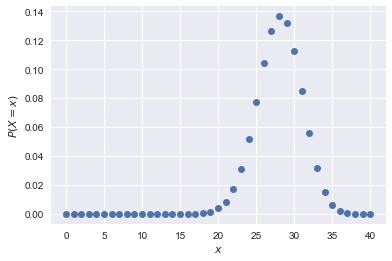

In [94]:
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

Посмотрим, как ведут себя биномиально распределенные величины при разных значениях параметров:

Text(0.5,0,'$x$')

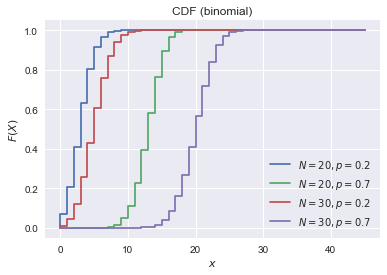

In [96]:
x = np.linspace(0,45,46)
for N in [20, 30]:
    for p in [0.2, 0.7]:
        rv = sts.binom(N, p)
        cdf = rv.cdf(x)
        plt.step(x, cdf, label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("CDF (binomial)")

plt.ylabel('$F(X)$')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

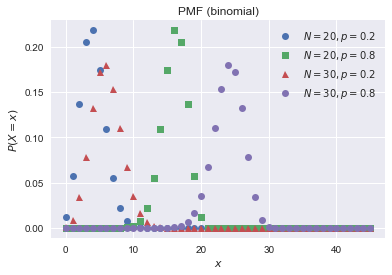

In [100]:
x = np.linspace(0,45,46)
symbols = iter(['o', 's', '^', 'o'])
for N in [20, 30]:
    for p in [0.2, 0.8]:
        rv = sts.binom(N, p)
        pmf = rv.pmf(x)
        plt.plot(x, pmf, next(symbols), label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("PMF (binomial)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

# Распределение Пуассона

Генерация выборок из распределения Пуассона с параметром $\lambda$:

In [101]:
poisson_rv = sts.poisson(5)
poisson_rv.rvs(10)

array([6, 4, 7, 2, 9, 4, 3, 5, 7, 5])

Text(0.5,0,'$x$')

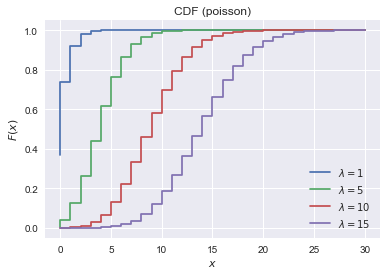

In [102]:
x = np.linspace(0,30,31)
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label="$\lambda=%s$" % l)
plt.legend()
plt.title("CDF (poisson)")

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

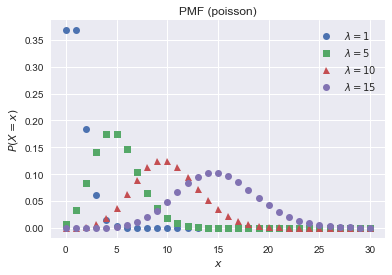

In [104]:
x = np.linspace(0,30,31)

symbols = iter(['o', 's', '^', 'o'])
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    pmf = rv.pmf(x)
    plt.plot(x, pmf, next(symbols), label="$\lambda=%s$" % l)
plt.legend()
plt.title("PMF (poisson)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

# Дискретное распределение общего вида

Чтобы сгенерировать дискретную случайную величину общего вида, нужно задать множество её значений и соответствующих вероятностей и использовать функцию ```numpy.random.choice```:

In [19]:
elements = np.array([1, 5, 12])
probabilities = [0.05, 0.7, 0.25]
np.random.choice(elements, 10, p=probabilities)

array([ 5, 12, 12, 12,  5, 12,  5,  5,  5,  5])

# Другие распределения

Существует большое количество других стандартных семейств распределений, многие из которых также можно генерировать в Питоне. 
Например, распределение хи-квадрат $\chi^2_k$, имеющее наутральный параметр $k$, который называется числом степеней свободы:

Text(0.5,1,'CDF ($\\chi^2_k$)')

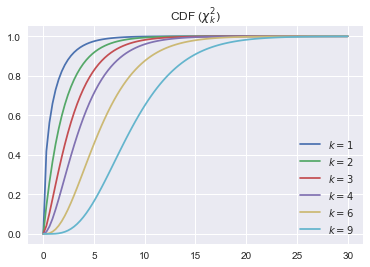

In [105]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    cdf = rv.cdf(x)
    plt.plot(x, cdf, label="$k=%s$" % k)
plt.legend()
plt.title("CDF ($\chi^2_k$)")

Text(0.5,1,'PDF ($\\chi^2_k$)')

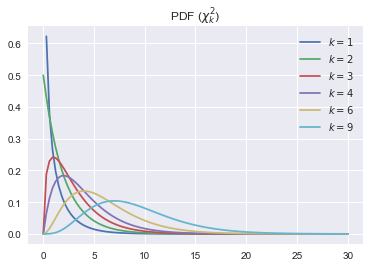

In [106]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
plt.title("PDF ($\chi^2_k$)")

Полный список функций SciPy для работы со всеми распределениями можно найти тут: http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html